<a href="https://colab.research.google.com/github/ossskkar/NLP/blob/master/Semantic_Similarity_with_Universal_Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semantic Similarity

Implementation of a semantic similarity score between texts using the [Universal Sentence Encoder](https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb). The Universal Sentence Encoder is employed to produce an embedding of the texts to be compared, and the similarity is measured by the inner product between the embeddings.



# Python class to compute semantic similarity score

In [101]:
#@title double-click to see the code

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import tensorflow_hub    as hub

from   absl              import logging
from   dataclasses       import dataclass

sns.set()

logging.set_verbosity(logging.ERROR)

@dataclass
class TextSim:
  ''' Class to compute semantic similarity among two list of strings'''
  module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
  model = hub.load(module_url)

  @staticmethod
  def clean(input):
    '''Convert inputs to list of string elements'''
    input = input if isinstance(input, list) else [input]
    return [str(element) for element in input] 

  def embed(self, input):
    '''Convert text to embedded representation'''
    return self.model(input)  

  def plot_all_results(self, inputA, inputB, corr):
    for i, itemA in enumerate(inputA):
      data = pd.DataFrame({'inputB': inputB, 'corr': corr[i]})
      data = data.sort_values(by='corr').reset_index(drop=True)
      self.plot_one_result(itemA, data)
      
  @staticmethod
  def plot_one_result(itemA, data):
      fig, g = plt.subplots(figsize = (8, 1*data.shape[0]))
      g = sns.barplot(x='corr', y='inputB', data=data, palette="Blues")
      g.set(xlim=(0, 1))
      g.set_xlabel(None)
      g.set_ylabel(None)
      g.set_title(f"Similarity to '{itemA}'")
      plt.show()

  def compare(self, inputA, inputB, display_score=True, return_scores=False):
    '''Compute pearson correlation among two list of inputs'''
    inputA, inputB = self.clean(inputA), self.clean(inputB)
    embedA, embedB = self.embed(inputA), self.embed(inputB)
    corr = np.inner(embedA, embedB)

    if display_score:
      self.plot_all_results(inputA, inputB, corr)
    
    if return_scores:
      return corr

ts = TextSim()

print(f'Model loaded: {ts.module_url}')

Model loaded: https://tfhub.dev/google/universal-sentence-encoder/4


# Semantic Similarity Between Words

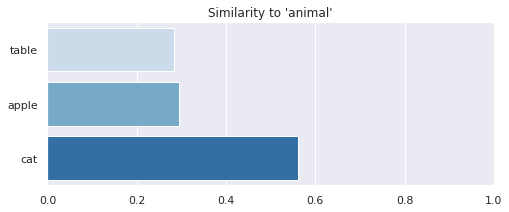

In [92]:
compare_from = ['animal']
compare_to   = ['cat', 'table', 'apple']
ts.compare(compare_from, compare_to)

# Semantic Similarity Between Sentences

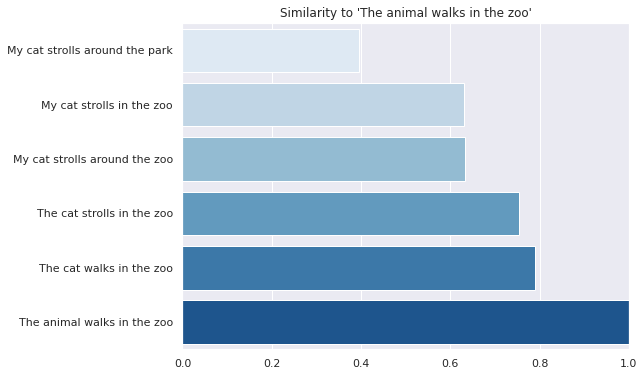

In [91]:
compare_from = ['The animal walks in the zoo']
compare_to   = ['The animal walks in the zoo', 
                'The cat walks in the zoo', 
                'The cat strolls in the zoo', 
                'My cat strolls in the zoo', 
                'My cat strolls around the zoo', 
                'My cat strolls around the park']
                
ts.compare(compare_from, compare_to)

# Semantic Similarity Between Questions

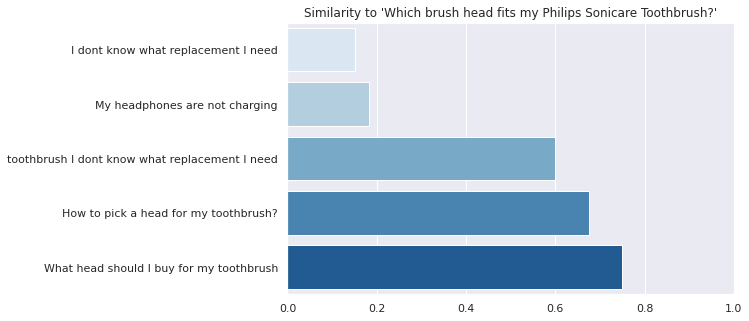

In [109]:
compare_from = ['Which brush head fits my Philips Sonicare Toothbrush?']
compare_to   = ['How to pick a head for my toothbrush?',
                'toothbrush I dont know what replacement I need',
                'I dont know what replacement I need',
                'What head should I buy for my toothbrush',
                'My headphones are not charging']
ts.compare(compare_from, compare_to)